In [487]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [488]:
import warnings
warnings.filterwarnings('ignore')

In [489]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_4_SLR

13-07-2022  11:01    <DIR>          .
13-07-2022  11:01    <DIR>          ..
01-07-2022  13:11    <DIR>          .ipynb_checkpoints
13-07-2022  11:01           526,675 assignment4_simple_linear_regression.ipynb
22-06-2020  18:01               218 delivery_time.csv
29-06-2022  18:29               318 Problem_statements.txt
29-06-2022  18:29               454 Salary_Data.csv
               4 File(s)        527,665 bytes
               3 Dir(s)  123,656,794,112 bytes free


# Q1

Problem: Predict delivery time using sorting time 

In [546]:
data_1=pd.read_csv("delivery_time.csv")

In [547]:
data_1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [548]:
data_1.shape

(21, 2)

In [549]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [550]:
data_1.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [551]:
corr=data_1.corr()

<AxesSubplot:>

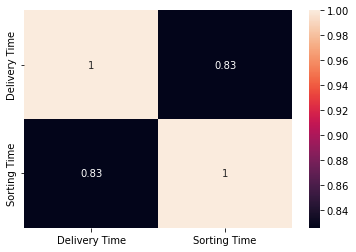

In [552]:
sns.heatmap(corr,annot=True)

Correlation =0.83, which is a high positive correlation. This means the dependent variable increases as the independent variable increases.

In [553]:
# Independent variable(feature) X--> sorting time
# Dependent variable (Target) Y--> delivery time

In [554]:
X1 = data_1['Sorting Time']
Y1 = data_1['Delivery Time']

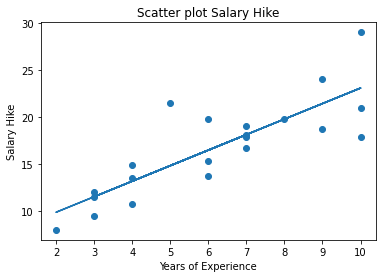

In [555]:
# Plot for better understanding of the relationship between X and Y
m, b=np.polyfit(X1,Y1,1)
plt.plot(X1, m*X1+b)
plt.scatter(X1,Y1)
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

The Salary hike and Years of Experiance are positively related

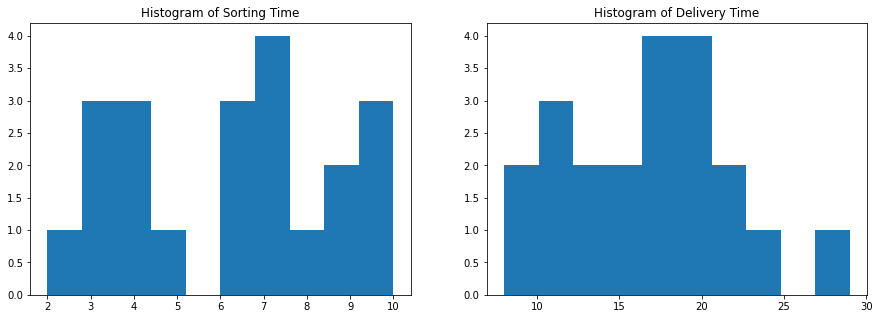

In [556]:
# Histogram plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(X1);
plt.title('Histogram of Sorting Time');
plt.subplot(1,2,2)
plt.hist(Y1);
plt.title('Histogram of Delivery Time');

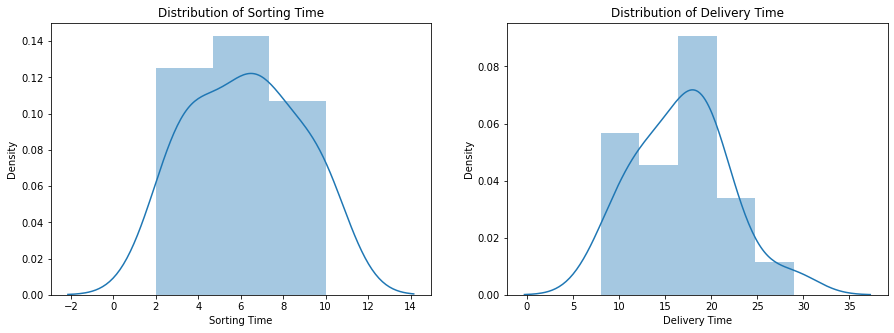

In [557]:
# Density plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(X1);
plt.title('Distribution of Sorting Time');
plt.subplot(1,2,2)
sns.distplot(Y1);
plt.title('Distribution of Delivery Time');

From distribution curve we can say that both Sorting time and Delivery time are following Normal Distribution

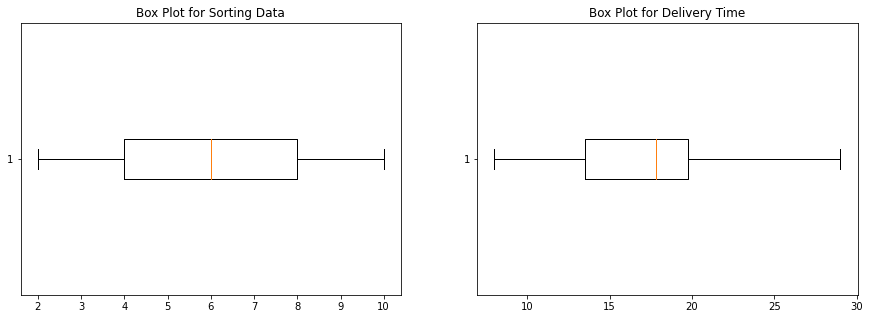

In [558]:
# Box Plot for detecting the Outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
plt.boxplot(X1,vert=False);
plt.title('Box Plot for Sorting Data');
plt.subplot(1,2,2);
plt.boxplot(Y1,vert=False)
plt.title('Box Plot for Delivery Time');

From the Box Plots we can see that there are not outliers present in the data

Text(0.5, 1.0, 'Line Plot')

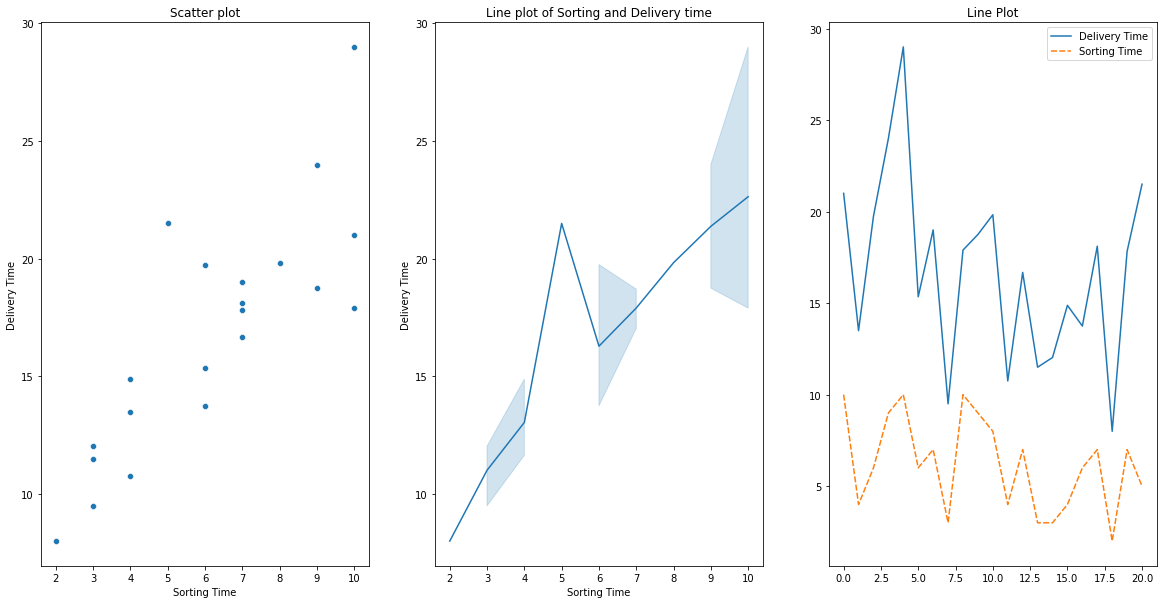

In [559]:
# Scatter Plot and line Plot
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(X1,Y1)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(X1,Y1)
plt.title("Line plot of Sorting and Delivery time")
plt.subplot(1,3,3)
sns.lineplot(data=data_1)
plt.title('Line Plot')


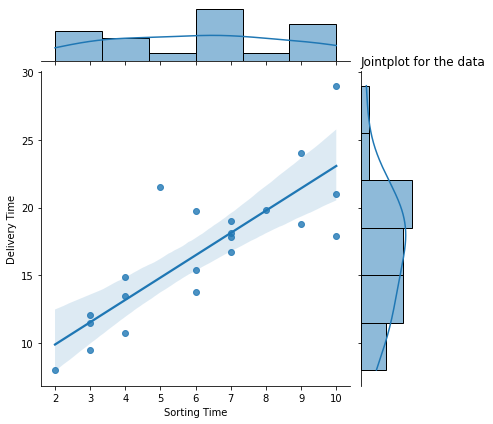

In [560]:
# Joint Plot
sns.jointplot(x=X1,y=Y1,kind='reg');
plt.title('Jointplot for the data',loc='left');

# Model Creation

In [613]:
X=data_1.iloc[:,1:2]
Y=data_1.iloc[:,0:1]

In [614]:
X.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [615]:
Y.head()

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [616]:
model=smf.ols("Y~X",data=data_1).fit()

In [617]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        11:31:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
model.rsquared

0.6822714748417231

In [567]:
model.aic

106.71400170798609

In [568]:
# To improve the r_squared value we will make some tranformations in the model

# Log Transformation of X

In [569]:
model_1=smf.ols('Y~np.log(X)',data=data_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        11:21:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(X)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
model_1.rsquared

0.6954434611324223

In [571]:
model_1.aic

105.82484961062757

# Log Transformation of Y

In [572]:
model_2=smf.ols("np.log(Y)~X",data=data_1).fit()

In [573]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        11:21:29   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
X              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [574]:
model_2.rsquared

0.7109478980584187

In [575]:
model_2.aic

-11.583929726652826

# Log Transformation of X and Y

In [576]:
model_3=smf.ols("np.log(Y)~np.log(X)",data=data_1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        11:21:30   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(X)      0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
model_3.rsquared

0.77216134926874

In [578]:
model_3.aic

-16.58128395971123

# sqrt transformation of X

In [594]:
model_4=smf.ols('Y~np.sqrt(X)',data=data_1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     20.72
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.14e-05
Time:                        11:28:04   Log-Likelihood:                -50.854
No. Observations:                  21   AIC:                             107.7
Df Residuals:                      18   BIC:                             110.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.2904     13.809     -0.456      0.654     -35.302      22.721
np.sqrt(X)[0]    11.2826     12.008      0.940      0.360     -13.945      36.510
np.sqrt(X)[1]    -0.7058      2.520     -0.280      0.783      -5.999       4.588
==============================================================================
Omnibus:                        5.104   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.158
Skew:                           0.910   Prob(JB):                        0.206
Kurtosis:                       3.543   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [595]:
model_4.rsquared

0.6971267163415128

In [596]:
model_4.aic

107.70846266826452

# sqrt transformation of Y

In [597]:
model_5=smf.ols('np.sqrt(Y)~X',data=data_1).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(Y)   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     24.69
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.93e-06
Time:                        11:28:21   Log-Likelihood:                -5.5891
No. Observations:                  21   AIC:                             17.18
Df Residuals:                      18   BIC:                             20.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1664      0.479      4.523      0.000       1.160       3.173
X[0]           0.4372      0.168      2.599      0.018       0.084       0.791
X[1]          -0.0185      0.013     -1.393      0.180      -0.046       0.009
==============================================================================
Omnibus:                        3.864   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.467
Skew:                           0.834   Prob(JB):                        0.291
Kurtosis:                       3.185   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [598]:
model_5.rsquared

0.7328611883884786

In [599]:
model_5.aic

17.178232843079158

# sqrt transformation of X and Y

In [601]:
model_6=smf.ols('np.sqrt(Y)~np.sqrt(X)',data=data_1).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(Y)   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     25.52
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.56e-06
Time:                        11:28:38   Log-Likelihood:                -5.3326
No. Observations:                  21   AIC:                             16.67
Df Residuals:                      18   BIC:                             19.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3263      1.580      0.206      0.839      -2.994       3.646
np.sqrt(X)[0]     2.1441      1.374      1.560      0.136      -0.743       5.031
np.sqrt(X)[1]    -0.2409      0.288     -0.835      0.414      -0.847       0.365
==============================================================================
Omnibus:                        3.309   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.046
Skew:                           0.761   Prob(JB):                        0.359
Kurtosis:                       3.147   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [602]:
model_6.rsquared

0.7393088747179122

In [603]:
model_6.aic

16.665157934628198

# Final Model--> model_3

In [604]:
print(model_3.rsquared , model_3.rsquared_adj)    # The r_squared value is good

0.77216134926874 0.7601698413355158


In [605]:
model_3.aic         # AIC value is quite low comapred to other models means the model is good

-16.58128395971123

In [606]:
model_3.pvalues

Intercept    5.921137e-11
np.log(X)    1.601539e-07
dtype: float64

In [607]:
model_3.params

Intercept    1.741987
np.log(X)    0.597522
dtype: float64

In [622]:
# Testing of the Model and Graphical Analysis

X=data_1.iloc[:,1:2]
Y=data_1.iloc[:,0:1]
Y_pred=model_3.predict(X)
Y_pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [623]:
new=pd.read_csv("delivery_time.csv")
new['DeliveryTime_predict']=Y_pred
new.head()

,Delivery Time,Sorting Time,DeliveryTime_predict
0,21.00,10,3.117833
1,13.50,4,2.570329
2,19.75,6,2.812603
3,24.00,9,3.054878
4,29.00,10,3.117833


<AxesSubplot:>

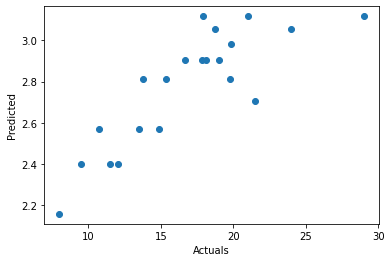

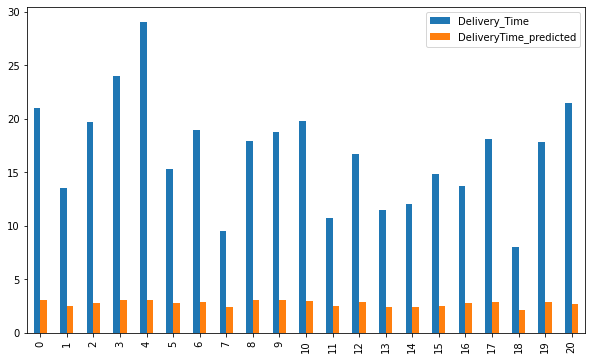

In [624]:
# Comparing the results using a bar graph

result=pd.DataFrame({'Delivery_Time':new['Delivery Time'], 'DeliveryTime_predicted':new['DeliveryTime_predict']})
plt.scatter(x=result['Delivery_Time'], y=result['DeliveryTime_predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
    
result.plot(kind='bar',figsize=(10,6))

# By making necessary transformations the final r_squared value is 0.772 from model 3

# Q2

Problem: Build a prediction model for Salary_hike

In [455]:
data_2=pd.read_csv("Salary_Data.csv")
data_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [456]:
data_2.shape

(30, 2)

In [457]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [458]:
data_2.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [459]:
correlation=data_2.corr()
print(correlation)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


<AxesSubplot:>

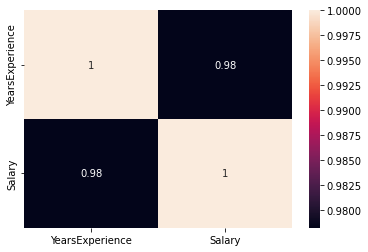

In [460]:
sns.heatmap(correlation,annot=True)

Correlation =0.98, which is a high positive correlation. This means the dependent variable increases as the independent variable increases.

In [461]:
x=data_2.iloc[:,0:1]
y=data_2.iloc[:,1:2]

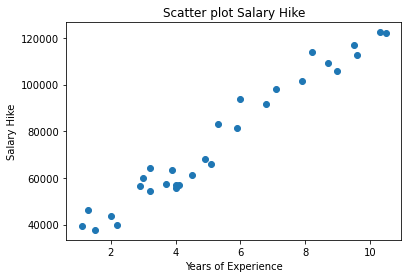

In [462]:
# Plot for better understanding of the relationship between X and Y
plt.scatter(x,y)
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

We can see that there is a positive relationship between X and Y

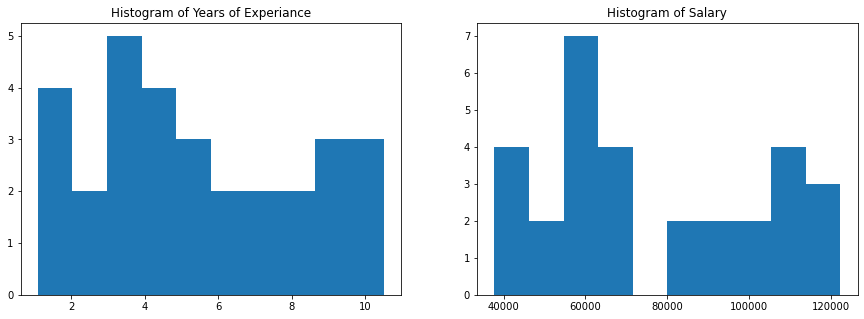

In [463]:
# Histogram plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data_2['YearsExperience']);
plt.title('Histogram of Years of Experiance');
plt.subplot(1,2,2)
plt.hist(data_2['Salary']);
plt.title('Histogram of Salary');

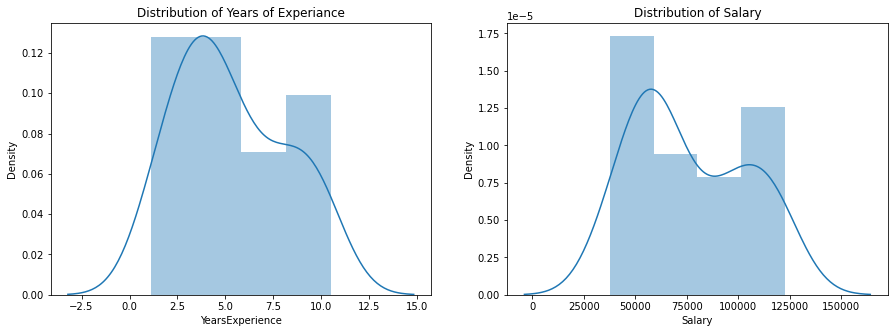

In [464]:
# Density plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data_2['YearsExperience']);
plt.title('Distribution of Years of Experiance');
plt.subplot(1,2,2)
sns.distplot(data_2['Salary']);
plt.title('Distribution of Salary');

From the Density Plot, YearsExperience looks like normally distributed, and Salary doesn't look normal.

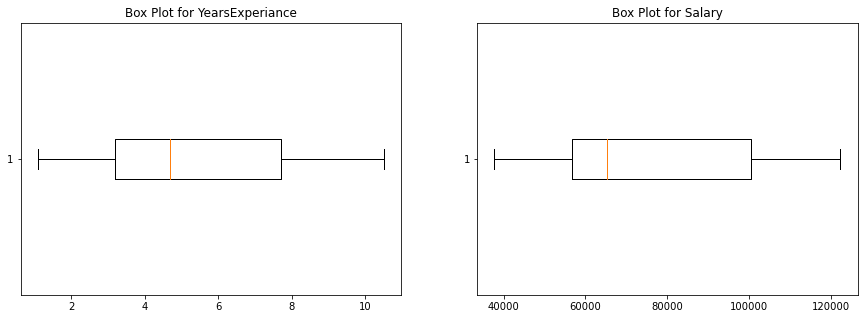

In [465]:
# Box Plot for detecting the Outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
plt.boxplot(data_2['YearsExperience'],vert=False);
plt.title('Box Plot for YearsExperiance');
plt.subplot(1,2,2);
plt.boxplot(data_2['Salary'],vert=False)
plt.title('Box Plot for Salary');

From the Box Plots we can see that there are no outliers in the data

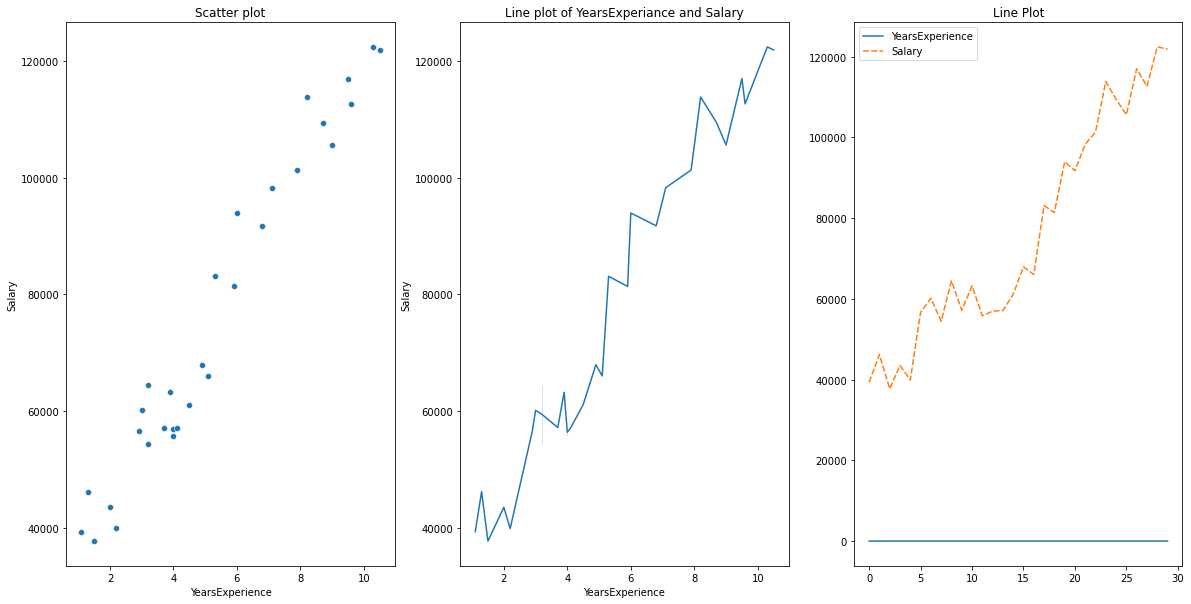

In [466]:
# Scatter Plot and line Plot
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data_2['YearsExperience'],data_2['Salary'])
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data_2['YearsExperience'],data_2['Salary'])
plt.title("Line plot of YearsExperiance and Salary")
plt.subplot(1,3,3)
sns.lineplot(data=data_2);
plt.title('Line Plot');

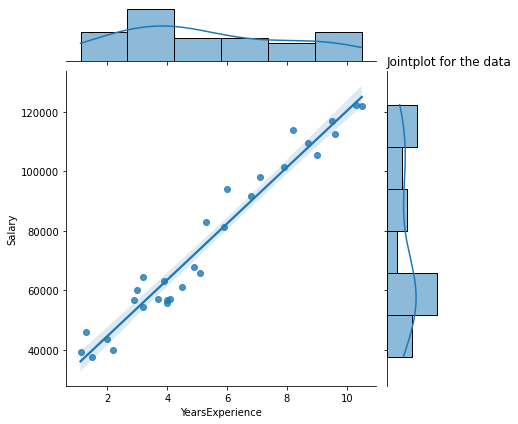

In [467]:
# Joint Plot
sns.jointplot(x=data_2['YearsExperience'],y=data_2['Salary'],kind='reg');
plt.title('Jointplot for the data',loc='left');

# Model Creation

In [468]:
m_1=smf.ols("y~x",data=data_2).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        10:58:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of Y

In [469]:
m_2=smf.ols('np.log(y)~x',data=data_2).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        10:58:41   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of X

In [470]:
m_3=smf.ols('y~np.log(x)',data=data_2).fit()
m_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        10:58:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(x)   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log Transformation of X and Y

In [471]:
m_4=smf.ols('np.log(y)~np.log(x)',data=data_2).fit()
m_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        10:58:41   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
np.log(x)      0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# sqrt transformation of Y

In [472]:
m_5=smf.ols('np.sqrt(y)~x',data=data_2).fit()
m_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(y)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.78e-20
Time:                        10:58:42   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
x             17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# sqrt transformation of X

In [473]:
m_6=smf.ols('y~np.sqrt(x)',data=data_2).fit()
m_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.57e-18
Time:                        10:58:42   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(x)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# sqrt transformation of X and Y

In [474]:
m_7=smf.ols('np.sqrt(y)~np.sqrt(x)',data=data_2).fit()
m_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(y)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.58e-19
Time:                        10:58:42   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(x)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The final r_squared value is 0.957, from model 1

In [475]:
m, c=m_1.params

In [476]:
m        # The value of slope

25792.200198668703

In [477]:
c        # The value of intercept

9449.962321455077

In [478]:
print(m_1.rsquared,m_1.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [479]:
m_1.aic

606.882316930432

In [480]:
m_1.pvalues

Intercept    5.511950e-12
x            1.143068e-20
dtype: float64

In [481]:
y_predict=m_1.predict(x)

In [482]:
y_predict

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [483]:
new_data=data_2
new_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [484]:
new_data['Salary_predicted']=y_predict
new_data.head()

,YearsExperience,Salary,Salary_predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


<AxesSubplot:>

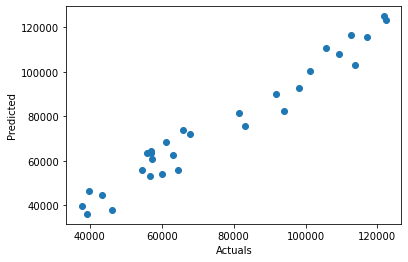

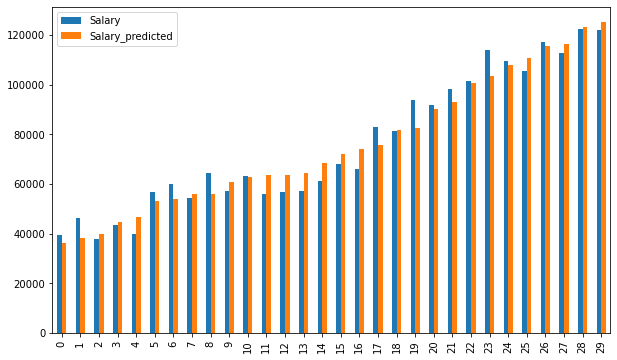

In [485]:
# Comparing the results using a bar graph

res=pd.DataFrame({'Salary':new_data['Salary'], 'Salary_predicted':new_data['Salary_predicted']})
plt.scatter(x=res['Salary'], y=res['Salary_predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
    
res.plot(kind='bar',figsize=(10,6))

# Conclusion

In our case, the R-squared value (0.957) is close to Adj. R-squared value (0.955) is a good sign that the input features are contributing to the predictor model.

Also the p_values are very less, hence we can say that the model is consistent.

Hence, we conclude by saying our model is performing well.